In [1]:
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("blobs.csv")

In [3]:
dataframe.head()

,Xblobs_X1,Xblobs_X2
0,1.684922,0.683154
1,-0.669550,-1.023103
2,-0.816166,-0.887977
3,1.188173,1.124579
4,1.179278,1.678473


In [4]:
neighbors = ["" for i in range(dataframe.shape[0])]
pt = [i for i in range(dataframe.shape[0])]
dataframe['neighbors'] = neighbors
dataframe['pt'] = pt

In [5]:
neighbors_dict = {}
def create_neighbors(dataframe, eps):
    x = list(dataframe['Xblobs_X1'])
    y = list(dataframe['Xblobs_X2'])
    for i in range(len(x)):
        point_X = (x[i], y[i])
        for j in range(len(y)):
            point_Y = (x[j], y[j])
            if(distance.euclidean(point_X,point_Y) <= eps):
                if(i in neighbors_dict):
                    neighbors_dict[i].append(j)
                else:
                    neighbors_dict[i] = [j]

In [6]:
create_neighbors(dataframe, 0.18)

In [7]:
for point in neighbors_dict.keys():
    neighs = ",".join(str(x) for x in neighbors_dict[point])
    dataframe.loc[dataframe['pt'] == point, 'neighbors'] = neighs

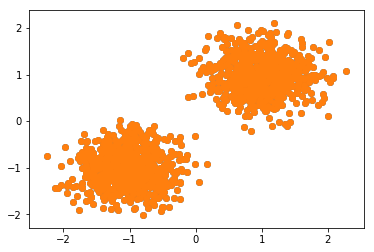

In [9]:
x = list(dataframe['Xblobs_X1'])
y = list(dataframe['Xblobs_X2'])
plt.scatter(x,y)
plt.show()

In [10]:
visited = []
clusters = {}
noise = []
def dbscan(dataframe, eps, minPoints):
    cluster = 0
    for index, row in dataframe.iterrows():
        neighbors = neighbors_dict[row.pt]
        if len(neighbors) < minPoints: 
            noise.append(index)
        else:
            clusters[cluster] = []
            expandCluster(index, neighbors, cluster, eps, minPoints)
            cluster += 1

In [11]:
def expandCluster(index, neighbors, cluster, eps, minPoints):
    while(len(neighbors) != 0):
        point = neighbors.pop(0)
        point = int(point)
        if point not in visited:
            visited.append(point)
            clusters[cluster].append(point)
            potential_cluster_points = neighbors_dict[point]
            neighbors.extend(potential_cluster_points)

In [12]:
dbscan(dataframe, 0.18, 5)

In [13]:
for cluster in clusters:
    temp_x = []
    temp_y = []
    for j in clusters[cluster]:
        temp_x.append(x[j])
        temp_y.append(y[j])
    if len(clusters[cluster]) > 0: 
        plt.scatter(temp_x, temp_y)

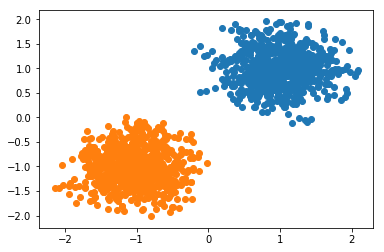

In [14]:
plt.show()